# Data Story of Client database

This data story concerns the data we have on our historical clients. Each row represents a claim, a claim is the period that R&D activity was undertaken that we are calculating for tax relief. Each period should be a year, i.e. from 01.04.15-31.03.16. Each row details the ID of each client ('CifNo'), which industry they're involved in, their status such as for each claim, the date by which we began our contract('DateReceived'), when we completed the claim ('Report Submitted'), how much of their expenditure qualified for tax relief ('RdRawCosts'), what the rate of tax relief should be derived from ('RdAdditional Costs'), what the benefit was ('ClientTaxBenefit'), what fees we charge for each client ('Fee Percentage'), their post code address, what turnover figures we have for the company, which phase the claim is, and their preferred benefit options.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
all_d = pd.read_csv('all_data.csv')
all_d=all_d[all_d['Claim Status'] == 'Paid']
all_d.columns
#visual check on the columns. For this analysis I will only extract the paid status claims as only they can evidence what the final fee would be.

Index(['CIFNo', 'Industry', 'Claim Status', 'Expr1', 'DateReceived',
       'ReportSubmitted', 'RdRawCosts', 'RdAdditionalCosts',
       'ClientTaxBenefit', 'FeePercentage', 'Report Fee', 'PostCode',
       'CIF_Turnover', 'Claim Phase', 'ClientBenefitOption'],
      dtype='object')

In [115]:
all_d.info()
#A check to see how many rows are in paid status, and check what the data types have been automated as.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 11025
Data columns (total 15 columns):
CIFNo                  2381 non-null object
Industry               2381 non-null object
Claim Status           2381 non-null object
Expr1                  2381 non-null object
DateReceived           2381 non-null object
ReportSubmitted        2363 non-null object
RdRawCosts             2381 non-null float64
RdAdditionalCosts      2381 non-null float64
ClientTaxBenefit       2381 non-null float64
FeePercentage          2379 non-null float64
Report Fee             2379 non-null float64
PostCode               2357 non-null object
CIF_Turnover           2381 non-null float64
Claim Phase            2379 non-null object
ClientBenefitOption    2381 non-null object
dtypes: float64(6), object(9)
memory usage: 297.6+ KB


We are interested in finding correlations in order to predict the value of R&D activity within a company's financial period.
I was mostly interested in the differences between Industries. the groupby function shows below that there is a wide variety of industries, which for the sake of data visualization makes it difficult to grasp. It would be useful to see which are the highest occurences in our data that have qualified, and completed the entire process.

In [116]:
group_industry=all_d.groupby('Industry')
Ind_mean = group_industry['RdRawCosts'].mean()
Ind_mean

Industry
Accountancy\r\n                            38610.261765
Aerospace                                 226667.068000
Animal/Veterinary \r\n                     28347.600000
Animator                                  354042.893333
Architecture                                1666.670000
Audio & Visual (inc. Music Industry)      156895.187778
Banking / Insurance                        42320.207857
Biotechnology                             112256.486429
Capital Allowances                             0.000000
Chemical                                   17213.240000
Construction                              109531.871610
Dental                                     39987.421176
Design                                     46254.425172
Electronics                                62085.152368
Environmental/Re-Cycling                   49583.011818
Event's Organiser                          36921.899000
Fabric/Clothing                           105946.510000
Film Industry                          

I suspected that the IT and Software industries would be the most frequent in our records, as it is liekly that a software based project is justifiable within R&D legislation. The value counts show that it is Manufacturing which is the most common. What is surprising is the frequency of Food & Drink, as they are suspected to be small side projects within this industry. However it is likely that the majority of these would be breweries. 

# I have selected the top 16 most frequent industries as the last one is above 30 and it seems right to have the minimum n for a z statistic...

# Want to do an analysis on breweries? it's probably obvious and won't be too useful to the conclusion of the capstone project...

In [117]:
Ind_counts=all_d['Industry'].value_counts()
Ind_15=Ind_counts.head(16)
Ind_15

Manufacturing                             476
IT/Software                               449
Food & Drink                              182
Mechanical Engineering                    177
Construction                              118
Management/Consulting/Training             92
Electronics                                76
Printing/Publishing/Literature Binding     69
Telecommunications                         58
Retail                                     51
Pharmaceuticals                            41
Logistics & Distribution                   37
Wholesalers/Imports                        36
Motor Industry                             36
Accountancy\r\n                            34
Medical Industry                           30
Name: Industry, dtype: int64

In [118]:
Ind_15=pd.DataFrame(Ind_15)
Ind_15=Ind_15.join(Ind_mean, how='left')

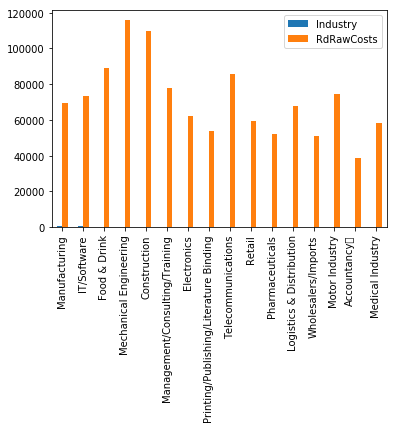

In [119]:
Ind_15.plot.bar()
plt.show()

Here we have a bar chart of the mean of each industry. Mechanical Engineering is the most valuable industry, with the Construction industry at a close second. Considering the differences in scale of R&D projects, the variance between the means of each industry is not so telling, but it is a useful consideration when we will be formulating the model for predicting claim values.

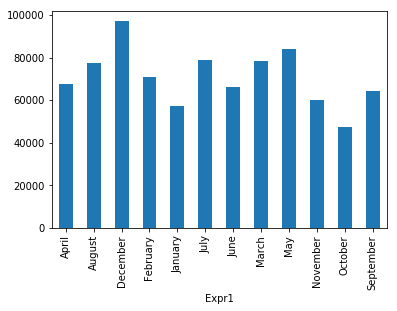

In [120]:
yr_end=all_d.groupby('Expr1')
yr_end_mean = yr_end['RdRawCosts'].mean()
yr_end_mean.plot.bar()
plt.show()

Perhaps it could be telling that a company invests in R&D depending on the financial period of the company, or perhaps it could indicate the success of processing the R&D claim. The variance is certainly tellin that January and October are not successful months. The difference between October and December is striking, and their being only two months apart. But perhaps it's unfair to quanitfy success of claim by the end of the company's financial period. Perhaps that it is inevitable that a busy month is followed by a contrasting quiet month.

The next graph shows the time period at which companies' initiated their contract with us. Similar to the previous graph, there is a down period around January. It is surprising to think that a company would be more or less likely to sign up depending on the time of the year, and that there would be a significant difference in their values based upon what time of the year they signed up on. The graph shows a large variation in the mean size of R&D claim values depending on when the company signed up. Perhaps this could be because a company with greater investment in R&D would sign up to the service last minute before they face their deadlines. 

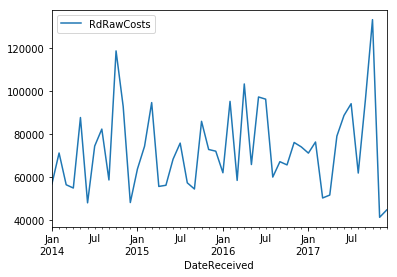

In [121]:
all_d['DateReceived']=pd.to_datetime(all_d['DateReceived'])
BQ_plot=all_d[['DateReceived', 'RdRawCosts']].copy()
BQ_plot=BQ_plot.set_index('DateReceived')
BQ_plot = BQ_plot['2014-01-01':'2017-12-31']
BQ_plot.dropna(axis=0, how='any', inplace=True)
BQ_plot = BQ_plot.resample('M').mean()
BQ_plot=pd.DataFrame(BQ_plot)
BQ_plot.plot()
plt.show()

Another visualization is to see the average per month across each annual period. We can still see a significant variation per month. Note that there is a cycle of rising and falling over the periods, peaking in February, April, June, July, October and November. Perhaps this pattern is following the busy periods of March, September and December. This would not really be explained by the rise in April and June, perhaps July's high value is explained by the busy period of September, but this wouldn't explain why August is so low.

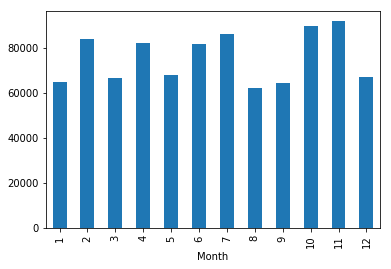

In [122]:
all_d['DateReceived']=pd.to_datetime(all_d['DateReceived'])
time_plot=all_d[['DateReceived', 'RdRawCosts']].copy()
time_plot=time_plot.set_index('DateReceived')
time_plot['Month']=time_plot.index.month
month_plot=time_plot.groupby('Month')
month_plot=month_plot['RdRawCosts'].mean()
month_plot.plot.bar()
plt.show()

Next we have a comparison of the identified claimable costs over a time period of three years. We can see that the trend is upwards. The average claim value has consistently increased and peaked in the third quarter of 2017, but we still have a consistent pattern of increases and decreases depending on the year. 

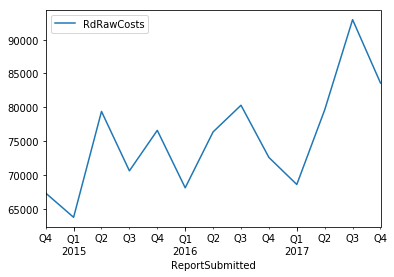

In [123]:
all_d['ReportSubmitted']=pd.to_datetime(all_d['ReportSubmitted'])
d_submitted_plot=all_d[['ReportSubmitted', 'RdRawCosts']].copy()
d_submitted_plot=d_submitted_plot.set_index('ReportSubmitted')
d_submitted_plot = d_submitted_plot['2014-10-01':'2017-10-31']
d_submitted_plot.dropna(axis=0, how='any', inplace=True)
d_submitted_plot = d_submitted_plot.resample('BQ').mean()
d_submitted_plot=pd.DataFrame(d_submitted_plot)
d_submitted_plot.plot()
plt.show()

Perhaps a very telling indicator of R&D raw value is the postcode of the client. Perhaps we can predict their R&D value based on their location. I have selected the top most frequent postcodes in order to make a fair visualization of the variance between different postcodes. The top most frequent postcodes represent 200 claims, or almost 10% of the total dataset. 15 postcodes out of 677.

# note we have the top 15 most frequent postcodes representing 200 observations out of 2381. How many is enough to represent the data for analysis, how many is useful for the sake of visualization?

In [124]:
postcode_counts=all_d['PostCode'].value_counts()
postcode_15=postcode_counts.head(15)
postcode_15.sum()

200

In [125]:
postcode_group=all_d.groupby('PostCode')
postcode_mean = postcode_group['RdRawCosts'].mean()
postcode_mean

PostCode
AB10      132140.285000
AB11       72182.805000
AL1        57617.000000
AL4        37551.441429
B12        49273.535000
B4          8803.315000
B49       160104.667500
B6         28812.320000
B64       485334.843333
B70        22551.995000
B77        39241.945000
B80        50795.575000
B92        87406.145000
B96        39324.985000
BA1         9435.900000
BA11       46132.463333
BA13       86229.290000
BA2        43171.110000
BA3        45778.863333
BA4        26593.785000
BA6        24984.355000
BB1        38407.865714
BB10       80807.250000
BB2       122811.398571
BB3        29941.970000
BB5        40500.400000
BB6        82595.885000
BB7        62939.330000
BB8       193011.698000
BB9        61703.180000
              ...      
WN3        15836.760000
WN5       121353.475000
WN6        50083.735000
WN7       332571.280000
WR14       57203.400000
WS10       60270.035000
WS11       60335.520000
WS13       55177.845000
WS15       33593.973333
WS2        18236.853333
WS4    

Below we can see great variance between the values of the top 15 postcodes. The top postcode SE11 is located in London, whereas WF12 is near Wakefield, Leeds. We can see areas which have a particular philosophy in R&D activity, or perhaps simply affluent areas. Either way, we might be able to predict the value of the R&D activity, but as the postcode dataset is large, perhaps we don't have the dataset to make this analysis. Inferential statistics would be useful to test the effectiveness of this metric.

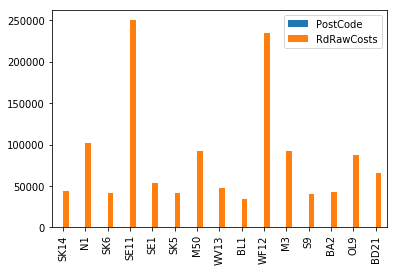

In [126]:
postcode_15=pd.DataFrame(postcode_15)
postcode_15=postcode_15.join(postcode_mean, how='left')
postcode_15.plot.bar()
plt.show()

Another possible predictor is the experience our clients have had with our company. Our company completes our services for our clients on an annual period, and review their financial data up to two years prior. Phase 01 may represent up to two years before, but as the two years have been completed by Phase 02, Phase 02 will be completed after we have previously met our clients, and visit them for a second time, and will be only one year. 

My concern was that considering we have not been a company for long and have grown rapidly, that the dataset will not be there past Phase 03. Clearly there is a sharp decline at each phase, and it may be difficult to make substantial comparisons between them. 

The bar plot below does show a difference between Phase 01 and Phase 02, but I would distrust the data past this point, as it is difficult to say whether the decline is because the quality of the relationship when our company was in its infancy, or if there is actually a downward trend after the second Phase. It is expected that Phase 02 is higher on average, but to what extent this is true, and how accurate this representation is, needs to be addressed.

In [127]:
phase_group=all_d.groupby('Claim Phase')
phase_counts=phase_group.size().reset_index(name='counts')
phase_counts

,Claim Phase,counts
0,Phase 01,1891
1,Phase 02,364
2,Phase 03,108
3,Phase 04,15
4,Phase 05,1


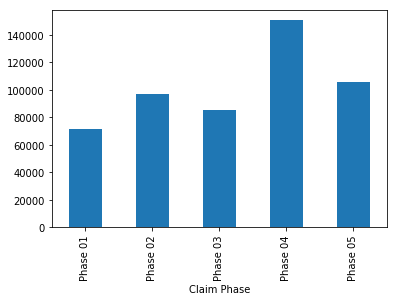

In [128]:
phase_group=phase_group['RdRawCosts'].mean()
phase_group.plot.bar()
plt.show()

There are some entries with the turnover entered in our initial client instruction form. 610 entriess have associated turnover figures, representing 25.6% of the total dataset. There are no surprises here that this would indicate the value of the claim. It should be a strong predictor of the benefit value of the R&D claim. 

# how to cut out the anomalies in the graph below to have a better representation of the bulk of the data?

In [129]:
cif_d=all_d[all_d['CIF_Turnover'] != float(0.0)]
cif_d.info()
610/len(all_d)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 11025
Data columns (total 15 columns):
CIFNo                  610 non-null object
Industry               610 non-null object
Claim Status           610 non-null object
Expr1                  610 non-null object
DateReceived           610 non-null datetime64[ns]
ReportSubmitted        609 non-null datetime64[ns]
RdRawCosts             610 non-null float64
RdAdditionalCosts      610 non-null float64
ClientTaxBenefit       610 non-null float64
FeePercentage          610 non-null float64
Report Fee             610 non-null float64
PostCode               607 non-null object
CIF_Turnover           610 non-null float64
Claim Phase            610 non-null object
ClientBenefitOption    610 non-null object
dtypes: datetime64[ns](2), float64(6), object(7)
memory usage: 76.2+ KB


0.25619487610247793

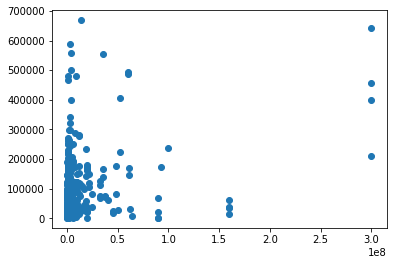

In [130]:
plt.scatter(cif_d['CIF_Turnover'], cif_d['RdRawCosts'])
plt.show()

Utilizing the earlier analyses, we can also consider the revenue to the company itself. Our standard fee is 30%, however many companies have negotiated a lower fee, perhaps for example, recommending our services, referring, promising a large value benefit. Below, the empty cells have been filled with the standard 30% rate. We see the distribution of fee rates. We can then plot how beneficial it has been for the company per fee rate. The largest fee values trend downwards the lower the fee rate is, but the distribution is quite equal between 20%, 25% and 30%. 

In [131]:
all_d['FeePercentage']=all_d['FeePercentage'].replace(0.0, 30)
all_d['FeePercentage']=all_d['FeePercentage'][all_d['FeePercentage'].between(0, 35, inclusive=False)]

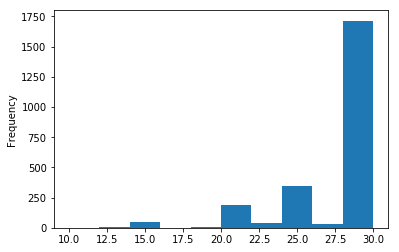

In [132]:
all_d['FeePercentage'].plot(kind='hist')
plt.show()

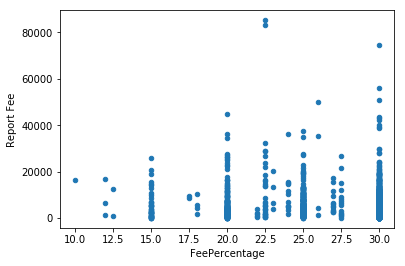

In [133]:
all_d.plot(x='FeePercentage', y='Report Fee',kind='scatter')
plt.show()

A useful predictor of the final benefit value is what rate the client chooses to obtain their benefit as. They can claim their benefit on the expenditure incurred on corporation tax owed, that will be owed, or trading losses. The rate of corporation is 20%, while the rate on trading losses is rewarded as 14.5% which is a significant difference. Below we see how much of a benefit our clients have won based on different benefit options.
Reduction in CT + Losses carried back + Losses caried forward essentially means these clients utilized the benefit against the corporation tax of three seperate periods, therefore they have maximised the potential and earned the most possible. The most interesting entry is RDEC and tax credit. RDEC is a lower percentage of 7%, therefore 7% of the client's claimable costs will earn a benefit. The lower rate of RDEC in this situation is likely because the client has a grant for a specific project, but they're also claiming for projects which do not have a grant attached, and they are able to earn more with the tax credit. Tax credit means the client utilized the R&D claim with their current trading losses, i.e. current losses of £50,000 and R&D created losses of £50,000 makes £100,000, thereby 14.5% of this is £14,500. This suggests that a client who have received a grant for a project and have additional projects have a lot of potential for tax relief. It could be an useful clue at the beginning of the process if a client has a grant, even if this does mean that some of their benefit will be a 7% RDEC.

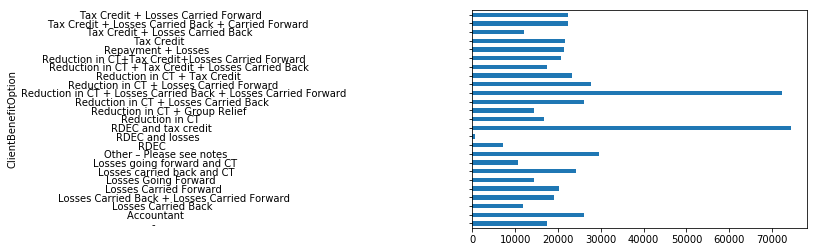

In [134]:
option_counts=all_d['ClientBenefitOption'].value_counts()
option_counts
option_group=all_d.groupby('ClientBenefitOption')
option_mean = option_group['ClientTaxBenefit'].mean()
option_mean.plot.barh()
plt.show()

The benefit options indicate in one method what the final benefit will be, however if they already have losses and the R&D creates losses, the benefit might actually be greater than a simple 14.5% calculation. It might be up to 230% instead, which is a cap on this type of benefit. I.e. 10000 * 130% * 14.5% = £1,885 and £10,000 * 230% * 14.5% = £3,335. This means that there can be great variations within the same benefit type. The next graph shows the breakdown of the rate the client receives their benefit as derived from the claimable costs. The bulk of clients obtain 25% of their money spent on R&D in tax relief. This would be an useful metric to calculate potential R&D claims against the client benefit option, bearing in mind that the bulk would receive 25%, but it can vary from 5% to 34%. 

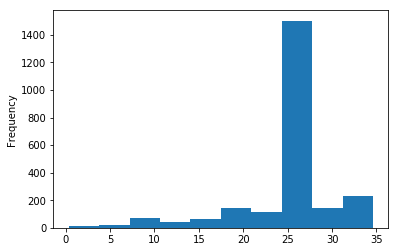

In [135]:
rate = all_d['ClientTaxBenefit'] / all_d['RdRawCosts'] * 100
rate=rate.replace([np.inf, -np.inf], np.nan)
rate=rate[rate.between(0, 35, inclusive=False)]
rate=rate.dropna()
rate.plot(kind='hist')
plt.show()

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?



From my analysis we can see that there are great variations in many features of the dataset which will be interesting in a deeper analysis whether they can be used to predict claim values. Industry is a particularly interesting variable to consider in itself, as it would be useful when considering a client solely on their industry what kind of investment in R&D we could anticipate. Although the industries typically invested in R&D dominate the others in terms of average investment, we have identified other variables which may be useful in predicting client R&D investments. We have looked at the time of the year in which clients sign up their contracts with us, their accounting ending periods, and post codes. These variables show variations in benefit values that would be useful to model along the industry type to deepen our prediction into R&D values. A question arises whether we have the dataset to make this analysis considering the number of claims in each phase, and the number of claims by each postcode. If we are successful in statistical analysis of the data we could uncover deeper insights into these variables and make a more accurate prediction.